In [8]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importing important functions/algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_excel('./Patterns Project.xlsx', sheet_name='Original')  # ./  is for current directory and there is no need here for this but just for sake of understanding.Do change the path if file is somewhere else 

In [3]:
df.describe()  # The std of some features is big which could cause a problem in PCA so standardize it first

,Month,Date,EURKM vs Budget,EURKM vs Budget(abs),Plan Capacity,Plan Km,Plan Load,Plan Net Revenue per Bus Km,Plan Net Yield,Plan Pax Km,...,YIELD vs Budget,YIELD vs Budget (abs),Km,Km Total,Net Revenue Per Km,Net Revenue Per Seat Km,Net Yield,Seat Km,Utilization (%),Outcome
count,22831.000000,22831.000000,22421.000000,22421.000000,22441.000000,22831.000000,22441.000000,22441.000000,22423.000000,2.283100e+04,...,22421.000000,22421.000000,22831.000000,2.283100e+04,22831.000000,22831.000000,22831.000000,2.283100e+04,22831.000000,22831.000000
mean,6.747273,2018.194735,-0.001725,-0.048463,54.490245,51830.204809,0.565135,1.486628,4.745389,1.722844e+06,...,0.016235,-0.177123,49664.515377,1.642622e+06,1.425633,0.025686,4.524891,2.832515e+06,0.532803,0.295213
std,3.375115,0.787724,0.508887,0.485943,23.634161,37821.740364,0.117718,0.851328,1.284120,1.961437e+06,...,0.881198,1.296406,37756.517776,1.751325e+06,0.882839,0.011066,1.740832,2.770321e+06,0.181587,0.456148
min,1.000000,2017.000000,-1.000000,-9.667131,19.975494,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,-1.000000,-18.500173,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,4.000000,2018.000000,-0.155681,-0.228383,48.130141,30174.500000,0.500003,1.105292,4.137426,7.983725e+05,...,-0.085798,-0.412930,28560.270000,7.272003e+05,1.055965,0.020400,3.965144,1.432746e+06,0.472096,0.000000
50%,7.000000,2018.000000,-0.009038,-0.011545,49.012477,43916.000000,0.568541,1.381691,4.644370,1.320326e+06,...,0.003860,0.018346,43130.200000,1.289940e+06,1.385265,0.026201,4.639051,2.267225e+06,0.564207,0.000000
75%,10.000000,2019.000000,0.149559,0.192533,54.003739,63656.000000,0.641165,1.741116,5.252786,2.128926e+06,...,0.091472,0.412197,62702.000000,2.108328e+06,1.766882,0.031978,5.349114,3.524148e+06,0.646336,1.000000
max,12.000000,2019.000000,14.431777,4.741925,730.036259,427338.000000,0.961876,24.063893,27.221611,4.833879e+07,...,31.196276,4.883833,425402.800000,4.065796e+07,22.559918,0.090757,27.607777,5.244246e+07,0.964033,1.000000


In [4]:
df.info()  # Deal with the string/object column types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22831 entries, 0 to 22830
Data columns (total 26 columns):
Line Code                      22831 non-null object
Month                          22831 non-null int64
Date                           22831 non-null int64
EURKM vs Budget                22421 non-null float64
EURKM vs Budget(abs)           22421 non-null float64
Plan Capacity                  22441 non-null float64
Plan  Km                       22831 non-null int64
Plan Load                      22441 non-null float64
Plan Net Revenue per Bus Km    22441 non-null float64
Plan Net Yield                 22423 non-null float64
Plan Pax Km                    22831 non-null int64
Plan Seat Km                   22831 non-null int64
SKM vs Budget                  22441 non-null float64
SKM vs Budget(abs)             22441 non-null float64
UTIL vs Budget                 22423 non-null float64
UTIL vs Budget (abs)           22423 non-null float64
YIELD vs Budget                22421 n

In [5]:
df_2 = df.dropna() # Dealing with missing values
df_2['Line Code'] = df_2['Line Code'].astype(str)  

/home/muhammadammarabid/Desktop/S/softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df_2['Line Code Label Encoded'] = LabelEncoder().fit_transform(df_2['Line Code'])
df_2.drop(['Line Code'], axis=1, inplace=True)

/home/muhammadammarabid/Desktop/S/softwares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/muhammadammarabid/Desktop/S/softwares/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
#df_2.drop(['Month', 'Date'], axis=1, inplace=True)

#df_2['Year_and_Month'] = df['Date'].astype('str') + '-' + df['Month'].astype('str')
#df_2['Year_and_Month'] = pd.to_datetime(df_2['Year_and_Month'])  # Converting Year_and_month col into datetime.As default day is 01 but right now it wouldn't make a problem
#df_2 = df_2.set_index('Year_and_Month')

#df_2['Year'] = df_2.index.year
#df_2['Month'] = df_2.index.month

df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22421 entries, 0 to 22830
Data columns (total 26 columns):
Month                          22421 non-null int64
Date                           22421 non-null int64
EURKM vs Budget                22421 non-null float64
EURKM vs Budget(abs)           22421 non-null float64
Plan Capacity                  22421 non-null float64
Plan  Km                       22421 non-null int64
Plan Load                      22421 non-null float64
Plan Net Revenue per Bus Km    22421 non-null float64
Plan Net Yield                 22421 non-null float64
Plan Pax Km                    22421 non-null int64
Plan Seat Km                   22421 non-null int64
SKM vs Budget                  22421 non-null float64
SKM vs Budget(abs)             22421 non-null float64
UTIL vs Budget                 22421 non-null float64
UTIL vs Budget (abs)           22421 non-null float64
YIELD vs Budget                22421 non-null float64
YIELD vs Budget (abs)          22421 

In [7]:
# Defining our features
features = df_2.drop('Outcome', axis=1)  

# Defining our labels
labels = df_2['Outcome']

# Scaling features
scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(features)

/home/muhammadammarabid/Desktop/S/softwares/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/muhammadammarabid/Desktop/S/softwares/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0.5, 0, 'Principar Component #')

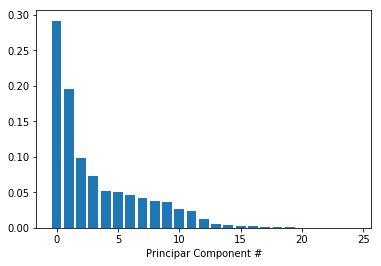

In [23]:
# Getting our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_features)
exp_variance = pca.explained_variance_ratio_

# Plotting the explained variance using a barplot
fig, ax = plt.subplots()
plt.bar(range(pca.n_components_), exp_variance)
ax.set_xlabel('Principar Component #')

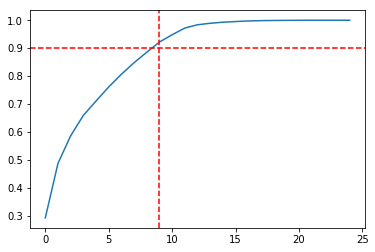

In [37]:
# Calculate ther cumulative explained variance
cum_exp_variance = np.cumsum(exp_variance)

# Plotting cumulative explained variance and drawing a dashed line at 0.90
fig, ax = plt.subplots()
ax.plot(range(0, pca.n_components_), cum_exp_variance)
ax.axhline(y=0.9, linestyle='--', c='red')
ax.axvline(x=9, linestyle='--', c='red')  # 9 n_components would do but actually its near 8.5 but can't do that coz PCA() requires n_components to be of int type 